## Problem statement:
Data set contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. The data was collected to answer the following question: Can you predict who would be interested in buying a caravan insurance policy and give an explanation why?

### observation: 
Given a input data of a person we need to predict wether this person will buy insurance or not(YES/NO or 1/0). this is **classifiction problem.**


In [1]:
# importing the libraries 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# reading the data
datafile_train=r'carvan_train.csv'
datafile_test=r'carvan_test.csv'
cd_train=pd.read_csv(datafile_train)
cd_test=pd.read_csv(datafile_test) 

In [3]:
# reading the labels for variables V1  and V5
V1_labels=pd.read_excel(r'P2_labels.xlsx',sheet_name='V1_labels')
V5_labels=pd.read_excel(r'P2_labels.xlsx',sheet_name='V5_labels')

In [4]:
#functions to display the all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [5]:
cd_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
# glimpse of the data
cd_train.info() 

# all the features are given as numerical data but in reality some are categorical data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      5822 non-null   int64
 1   V2      5822 non-null   int64
 2   V3      5822 non-null   int64
 3   V4      5822 non-null   int64
 4   V5      5822 non-null   int64
 5   V6      5822 non-null   int64
 6   V7      5822 non-null   int64
 7   V8      5822 non-null   int64
 8   V9      5822 non-null   int64
 9   V10     5822 non-null   int64
 10  V11     5822 non-null   int64
 11  V12     5822 non-null   int64
 12  V13     5822 non-null   int64
 13  V14     5822 non-null   int64
 14  V15     5822 non-null   int64
 15  V16     5822 non-null   int64
 16  V17     5822 non-null   int64
 17  V18     5822 non-null   int64
 18  V19     5822 non-null   int64
 19  V20     5822 non-null   int64
 20  V21     5822 non-null   int64
 21  V22     5822 non-null   int64
 22  V23     5822 non-null   int64
 23  V24     5822 

In [7]:
# No of unique values in each feature/varibles
cd_train.nunique().sort_values(ascending=False)

V1     40
V21    10
V23    10
V24    10
V25    10
V26    10
V27    10
V28    10
V30    10
V31    10
V32    10
V35    10
V36    10
V37    10
V38    10
V39    10
V40    10
V42    10
V55    10
V22    10
V34    10
V9     10
V6     10
V5     10
V10    10
V19    10
V12    10
V13    10
V14    10
V15    10
V16    10
V17    10
V18    10
V7     10
V29     9
V2      9
V59     9
V41     8
V33     8
V11     8
V43     8
V56     7
V80     7
V45     7
V61     7
V63     7
V68     7
V51     6
V54     6
V20     6
V76     6
V49     6
V8      6
V47     6
V4      6
V52     5
V64     5
V73     5
V69     5
V58     5
V74     5
V3      5
V53     5
V72     4
V71     4
V70     4
V83     4
V44     4
V50     4
V48     4
V46     4
V82     3
V65     3
V85     3
V60     3
V57     3
V75     3
V84     3
V66     3
V79     3
V67     2
V78     2
V81     2
V77     2
V62     2
V86     2
dtype: int64

In [8]:
# classfing the all feature/variables into Categorical or numerical data types based on the variables
# categorical: V1(L0:Customer Subtype), V5(L2:Customer main type) 
# numeric: remaing all
# target column: V86 takes (0/1) values only
cd_train.shape,cd_test.shape

((5822, 86), (4000, 85))

### Exploratory data analysis:

#### Categorical variables: V1 and V5 

In [9]:
# copying the data for EDA
cd_train_copy=cd_train.copy()
# converting the V1,V5 and V86 as type categorical 
cd_train_copy[['V1','V5']]=cd_train_copy[['V1','V5']].astype('O')

In [10]:
#Percentage of response variables in the training dataset.
cd_train_copy['V86'].value_counts()/cd_train.shape[0]

V86
0    0.940227
1    0.059773
Name: count, dtype: float64

In [11]:
# replating the values in V1,V5 and V86 variables with their labels
cd_train_copy[['V1']]=cd_train_copy[['V1']].replace(list(V1_labels['Value']),list(V1_labels['Customer Subtype']))
cd_train_copy[['V5']]=cd_train_copy[['V5']].replace(list(V5_labels['Value']),list(V5_labels['Customer main type']))
cd_train_copy[['V86']]=cd_train_copy[['V86']].replace([0,1],['No','Yes']) 

<Axes: xlabel='Buy Insurance', ylabel='Customer_Main_type'>

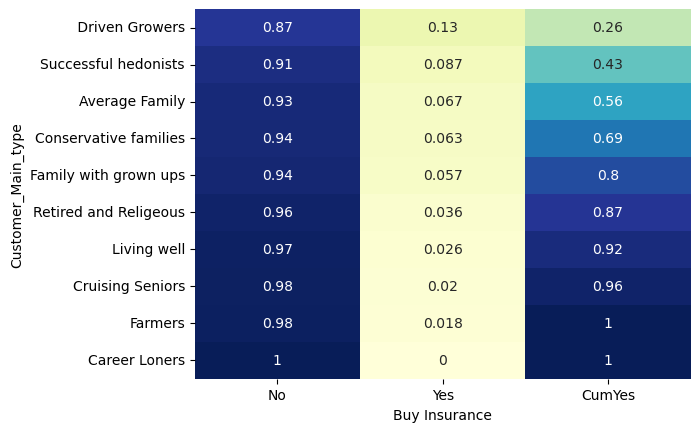

In [12]:
# cross tabulation: 'Buy insurance' vs 'customer main type(V5)' 
df_cust_main=pd.crosstab(columns=cd_train_copy['V86'],
            colnames=['Buy Insurance'],
            index=cd_train_copy['V5'],
            rownames=['Customer_Main_type'],
            normalize='index'
           ).sort_values('Yes',ascending=False).round(3)

# Creating new column for cummulative summation of Buy insurance:'Yes'
df_cust_main['CumYes']=(df_cust_main['Yes'].cumsum()/df_cust_main['Yes'].sum()).round(4)

# droping the buying insurance 'No' column 
#df_cust_main.drop(['No'],axis=1,inplace=True) 
sns.heatmap(df_cust_main,cmap="YlGnBu", annot=True, cbar=False)  

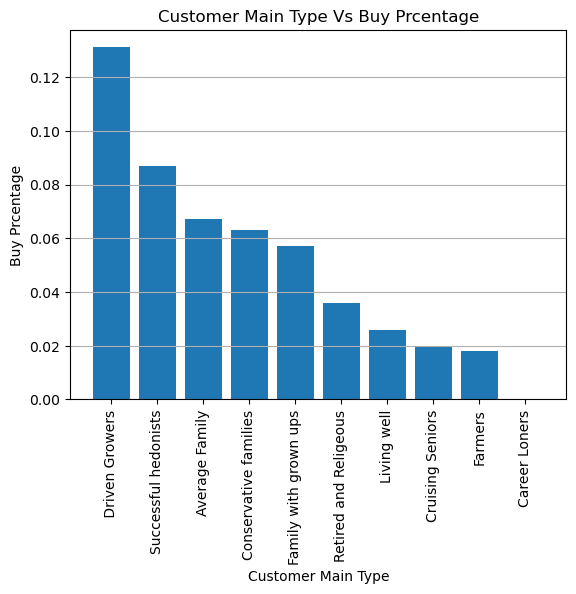

In [13]:
# Percentage of customer buy insurance in each main category
plt.bar(df_cust_main.index,df_cust_main.Yes)
plt.title("Customer Main Type Vs Buy Prcentage")
plt.xlabel("Customer Main Type")
plt.ylabel("Buy Prcentage")
plt.xticks(rotation=90) 
plt.grid(axis='y') 

### observations: 
-  **Top 5 customer main types for effective Campain/Marketing: contribute 80% of total buying customers**
     1. **"Driven Growers"** with 13.15% customers buy insurance and 26% of total buying customers are "Driven Growers"
     2. **"Successful hedonists"** with 8.7% customers buy insurance and 17% of total buying customers are "Driven Growers"
     3. **"Average Family"** with 6.7% customers buy insurance and 13% of total buying customers are "Average Family"
     4. **"Conservative Family"** with 6.3% customers buy insurance and 13% of total buying customers are "Conservative Family"
     5. **"Conservative Family"** with 6.3% customers buy insurance and 13% of total buying customers are "Conservative Family"

--  **"Career Loners","Farmers" & "Crusing Seniors"** customer type with **0% , 1.8% & 2% buy insurance respectively.**

<Axes: xlabel='Buy Indurance', ylabel='Cust_Main_type-Cust_Sub_type'>

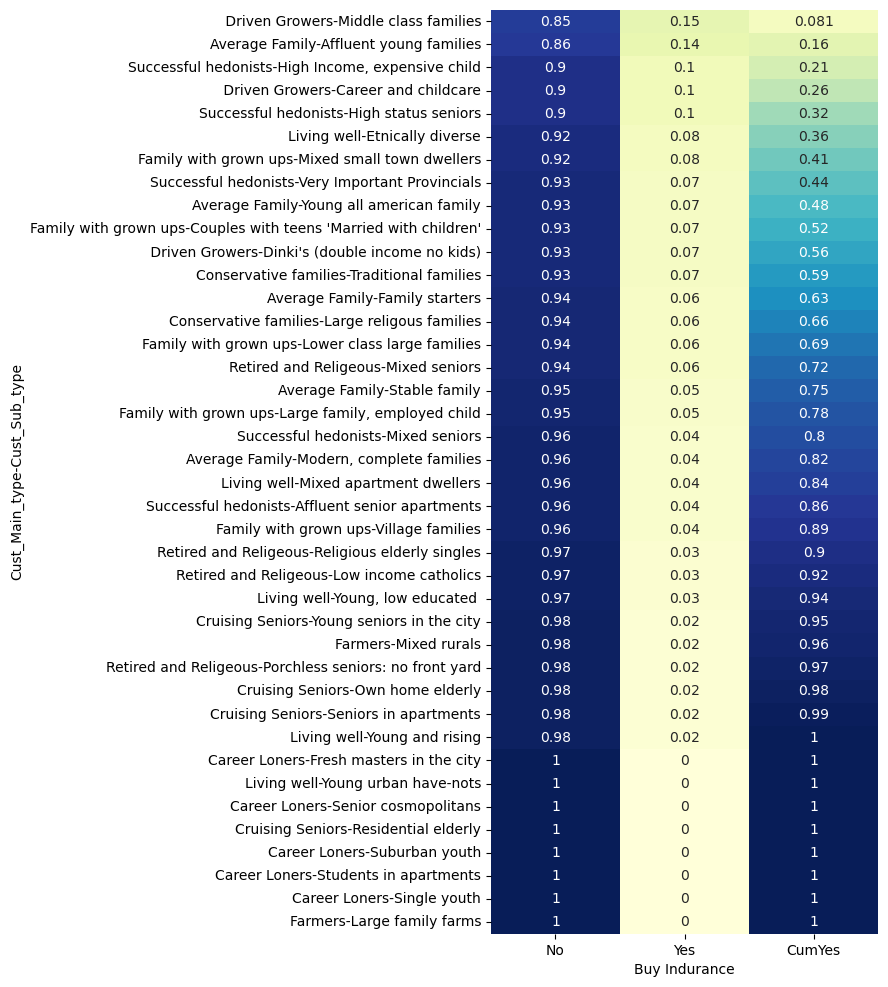

In [15]:
# cross tabulation: 'Buy insurance' vs 'customer sub type(V1)' 
df_cust_sub=pd.crosstab(columns=cd_train_copy['V86'],
            colnames=['Buy Indurance'],
            index=[cd_train_copy['V5'],cd_train_copy['V1']],
            rownames=['Cust_Main_type','Cust_Sub_type'],
            normalize='index'
           ).sort_values(['Yes'],ascending=False).round(2)

# Creating new column for cummulative summation of Buy insurance:'Yes'
df_cust_sub['CumYes']=(df_cust_sub['Yes'].cumsum()/df_cust_sub['Yes'].sum()).round(4)

# seting the figure size
fig, ax = plt.subplots(figsize=(5, 12))

# heat map for better visulization of numebers
sns.heatmap(df_cust_sub,cmap='YlGnBu',cbar=False,annot=True,ax=ax)


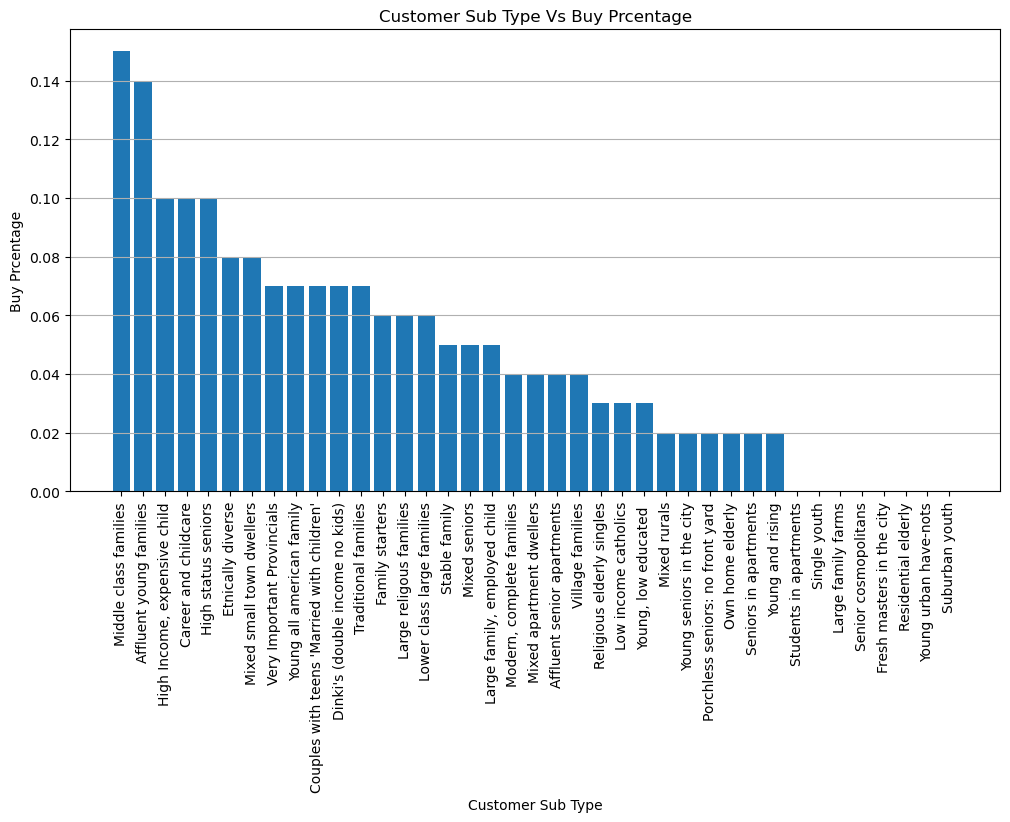

In [16]:
df_cust_sub_only=pd.crosstab(columns=cd_train_copy['V86'],
            colnames=['Buy Indurance'],
            index=[cd_train_copy['V1']],
            rownames=['Cust_Sub_type'],
            normalize='index'
           ).sort_values(['Yes'],ascending=False).round(2)

# Creating new column for cummulative summation of Buy insurance:'Yes'
df_cust_sub_only['CumYes']=(df_cust_sub_only['Yes'].cumsum()/df_cust_sub_only['Yes'].sum()).round(4)

df_cust_sub_only
# Percentage of customer buy insurance in each Sub Category
plt.figure(figsize=(12,6))
plt.bar(df_cust_sub_only.index,df_cust_sub_only.Yes)
#plt.plot(df_cust_sub_only.index,df_cust_sub_only.CumYes,color='red')
plt.title("Customer Sub Type Vs Buy Prcentage")
plt.xlabel("Customer Sub Type")
plt.ylabel("Buy Prcentage")
plt.xticks(rotation=90) 
plt.grid(axis='y')

### Observations from Customer sub types:
-  **"Middle class families"**: Top most interested(15% buy)

-  **"Affluent young families"**:Second most interested(14% buy) but their main customer type("Average Family") with 6.7% buy.

-  **There are sub categories with zero percent interested in insurance other than "Career Lonere"**

       - 'Living well'(Main type):       'Young urban have-nots'(Sub type)
       - 'Cruising Seniors'(Main type):  'Residential elderly'(Sub type)
       - 'Farmers'(Main type):           'Large family farms'(Sub type) 

#### Numerical Variables: Analysis

In [17]:
temp=pd.read_csv(r"variable_description.txt")
k=temp.iloc[:,0].str.split(pat=" ",n=2,expand=True)
k['var']='V'+k[0]
k=k[['var',2]]
k.columns=['var_no','var_name']
k.head() 

,var_no,var_name
0,V1,Customer Subtype
1,V2,Number of houses
2,V3,Avg size household
3,V4,Avg age
4,V5,Customer main type


In [18]:
cd_train_copy.columns=k['var_name']
cd_train_copy.head() 

var_name,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,Living together,Other relation,Singles,Household without children,Household with children,High level education,Medium level education,Lower level education,High status,Entrepreneur,Farmer,Middle management,Skilled labourers,Unskilled labourers,Social class A,Social class B1,Social class B2,Social class C,Social class D,Rented house,Home owners,1 car,2 cars,No car,National Health Service,Private health insurance,Income < 30.000,Income 30-45.000,Income 45-75.000,Income 75-122.000,Income >123.000,Average income,Purchasing power class,Contribution private third party insurance,Contribution third party insurance (firms),Contribution third party insurane (agriculture),Contribution car policies,Contribution delivery van policies,Contribution motorcycle/scooter policies,Contribution lorry policies,Contribution trailer policies,Contribution tractor policies,Contribution agricultural machines policies,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution fire policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,Number of private third party insurance,Number of third party insurance (firms),Number of third party insurane (agriculture),Number of car policies,Number of delivery van policies,Number of motorcycle/scooter policies,Number of lorry policies,Number of trailer policies,Number of tractor policies,Number of agricultural machines policies,Number of moped policies,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies
0,Lower class large families,1,3,2,Family with grown ups,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
1,Mixed small town dwellers,1,2,2,Family with grown ups,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,Mixed small town dwellers,1,2,2,Family with grown ups,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,"Modern, complete families",1,3,3,Average Family,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,Large family farms,1,4,2,Farmers,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


<Axes: xlabel='var_name', ylabel='var_name'>

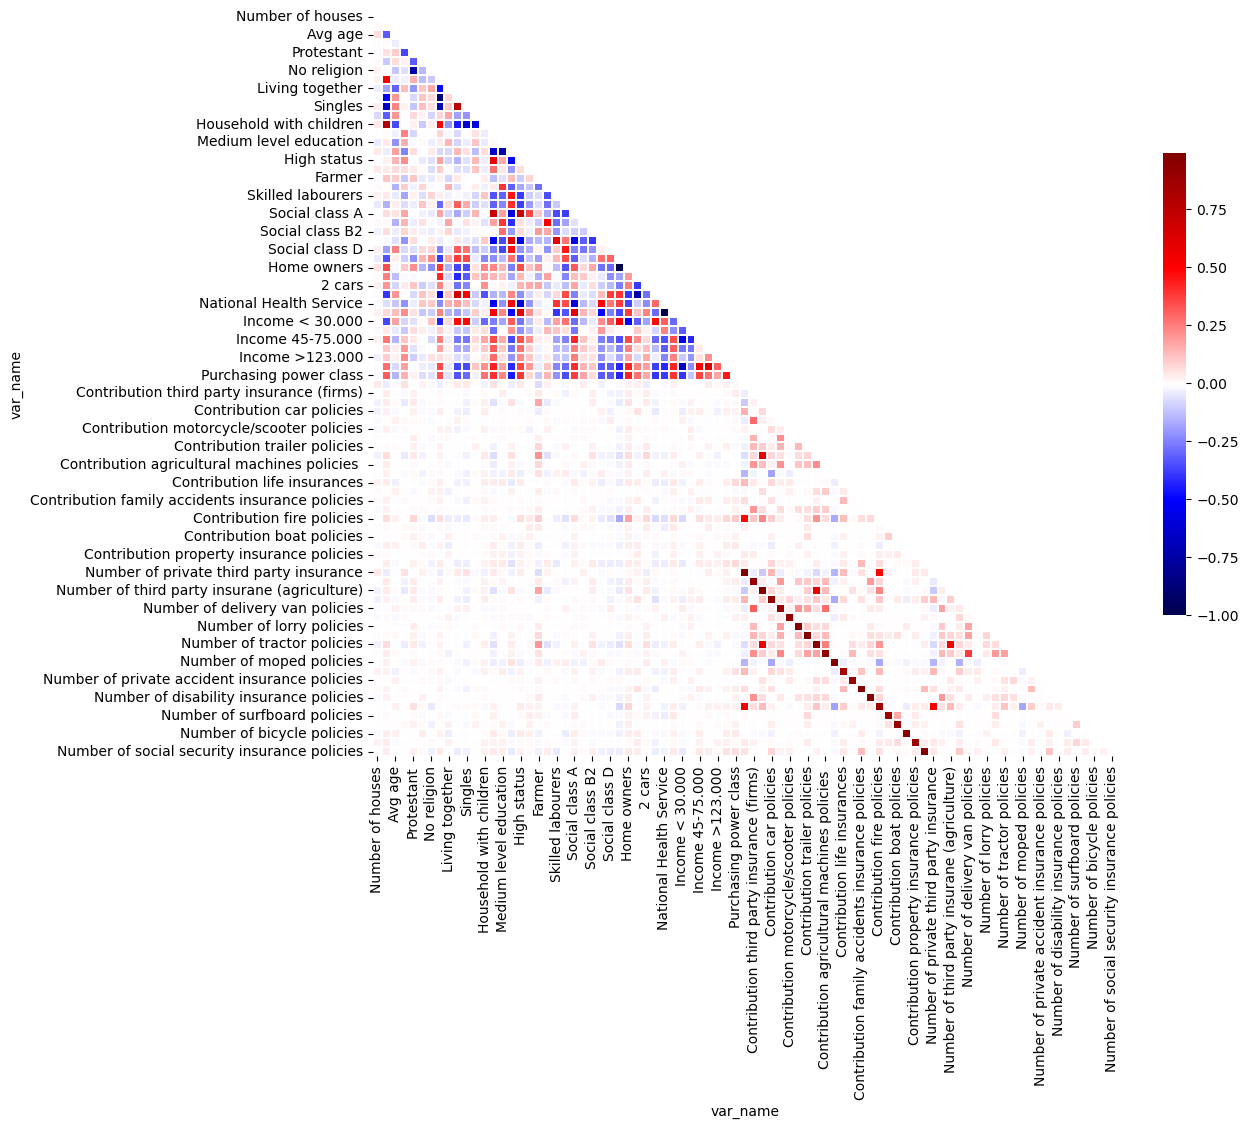

In [19]:
# compute correlation matrix 
corr=cd_train_copy.select_dtypes(exclude='O').corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) 

# Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(corr,mask=mask,cmap='seismic',cbar=True,
            square=True, linewidths=0.05,annot=False,cbar_kws={"shrink": .5})

<Axes: xlabel='var_name', ylabel='var_name'>

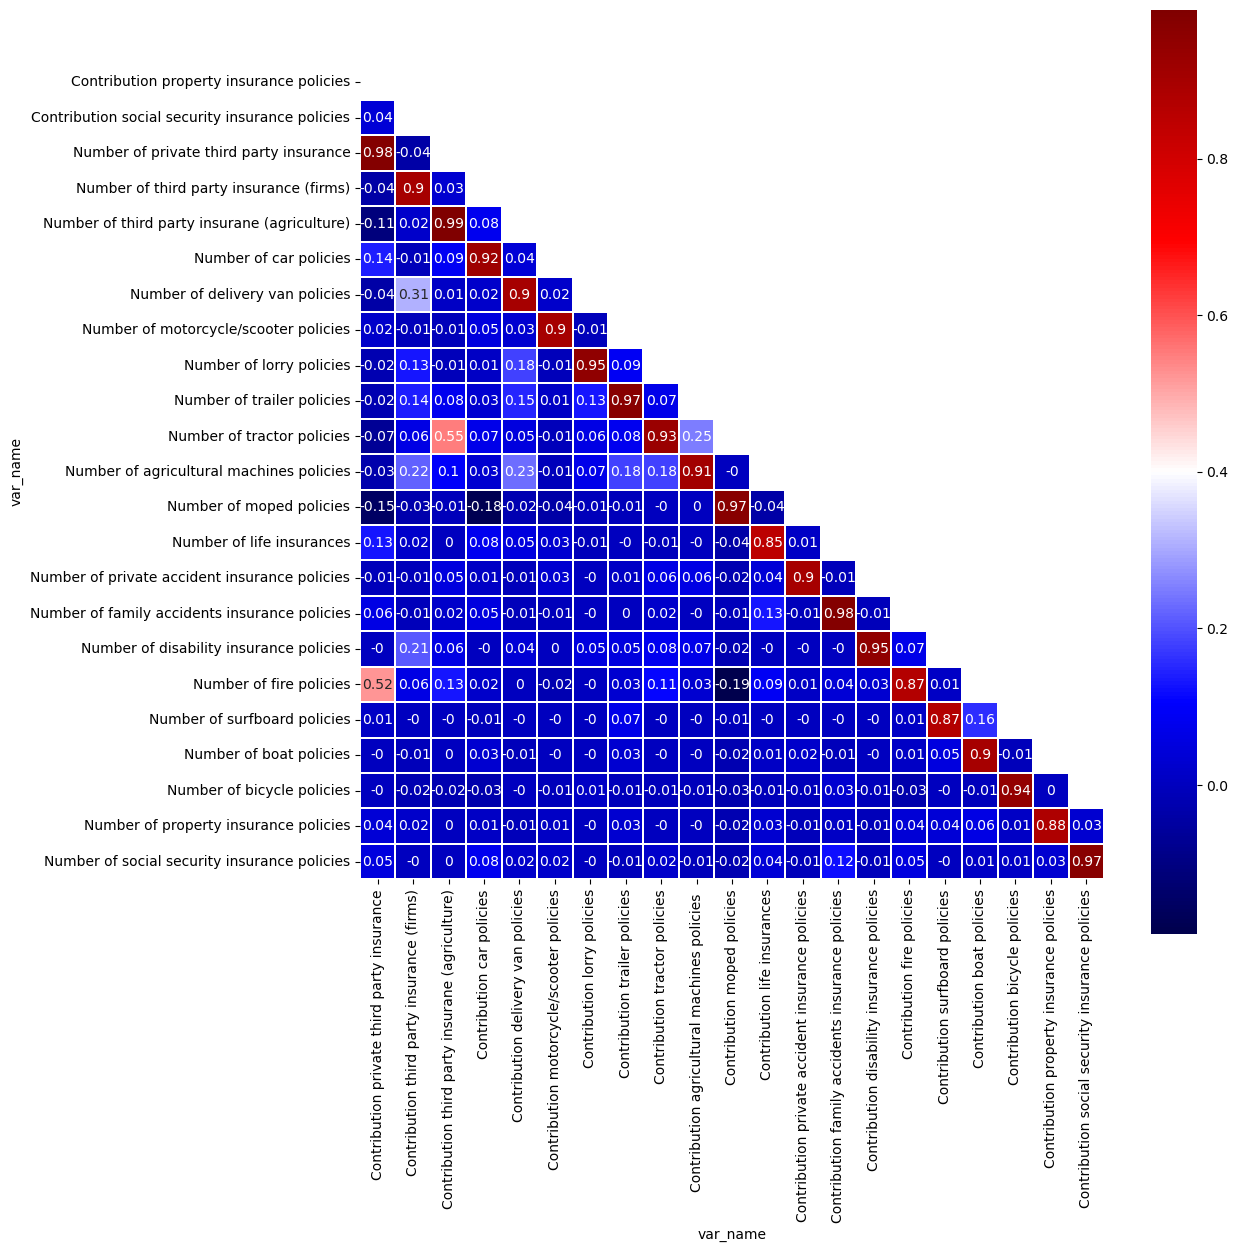

In [20]:
## genating the heatmap for V44 to V64 where high corelation present

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr.iloc[60:,41:62], dtype=bool)) 

# Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(corr.iloc[60:,41:62],mask=mask,cmap='seismic',cbar=True,square=True, linewidths=0.05,annot=True)  

- Variables V44-V64 and V65-V85 are high posively correlated with corrrelation value greater than 0.9. 
- Reason: V44-V64 represents numbers of policies and V65-V85 represents contribution of same policies

<Axes: xlabel='var_name', ylabel='var_name'>

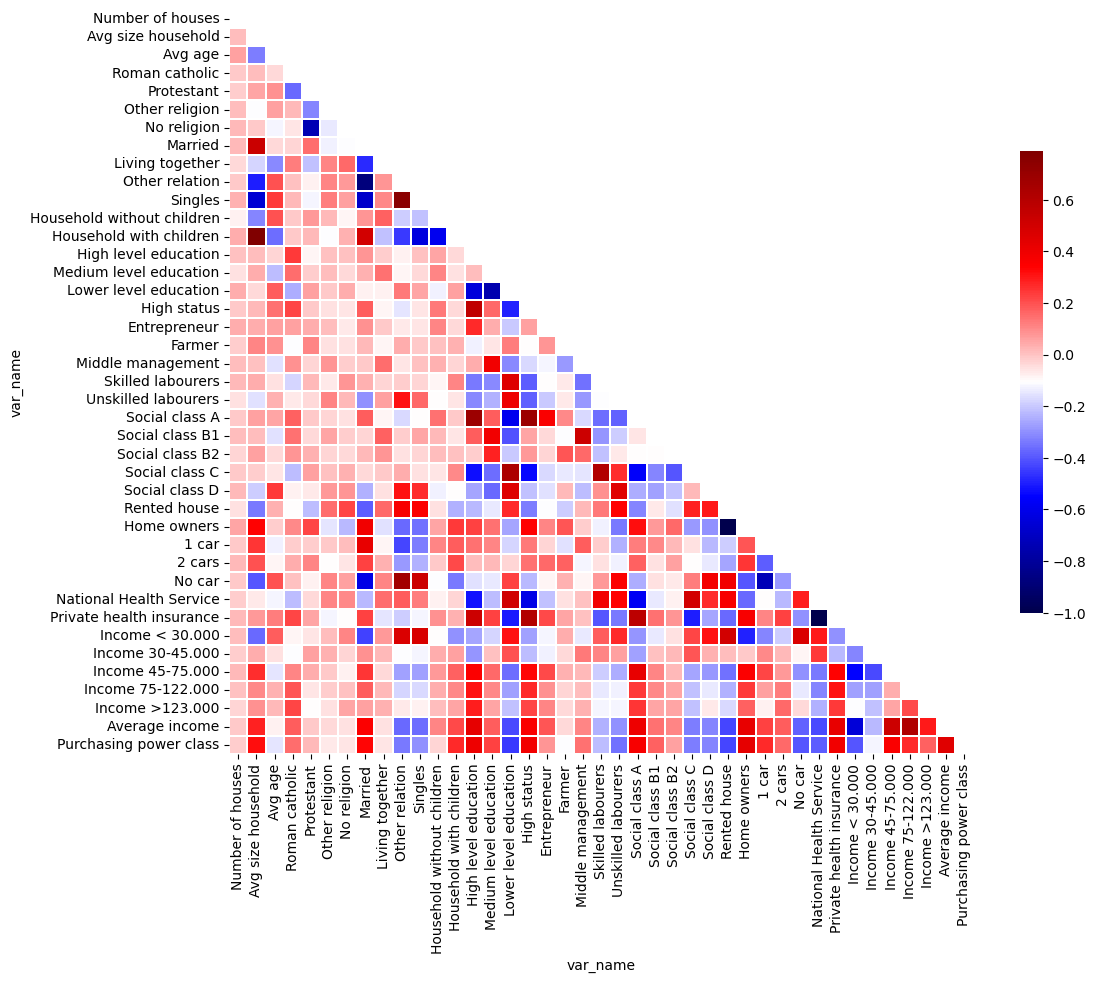

In [21]:
## genating the heatmap for V44-V64 vs V65-V85 where high corelation present

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr.iloc[0:41,0:41], dtype=bool)) 

# Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(corr.iloc[0:41,0:41],mask=mask,cmap='seismic',cbar=True,
            square=True, linewidths=0.05,annot=False,cbar_kws={"shrink": .5}) 

In [22]:
cd_train.shape

(5822, 86)

### Feature Importance:

In [23]:
cd_train_copy.head() 

var_name,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,Living together,Other relation,Singles,Household without children,Household with children,High level education,Medium level education,Lower level education,High status,Entrepreneur,Farmer,Middle management,Skilled labourers,Unskilled labourers,Social class A,Social class B1,Social class B2,Social class C,Social class D,Rented house,Home owners,1 car,2 cars,No car,National Health Service,Private health insurance,Income < 30.000,Income 30-45.000,Income 45-75.000,Income 75-122.000,Income >123.000,Average income,Purchasing power class,Contribution private third party insurance,Contribution third party insurance (firms),Contribution third party insurane (agriculture),Contribution car policies,Contribution delivery van policies,Contribution motorcycle/scooter policies,Contribution lorry policies,Contribution trailer policies,Contribution tractor policies,Contribution agricultural machines policies,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution fire policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,Number of private third party insurance,Number of third party insurance (firms),Number of third party insurane (agriculture),Number of car policies,Number of delivery van policies,Number of motorcycle/scooter policies,Number of lorry policies,Number of trailer policies,Number of tractor policies,Number of agricultural machines policies,Number of moped policies,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies
0,Lower class large families,1,3,2,Family with grown ups,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
1,Mixed small town dwellers,1,2,2,Family with grown ups,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,Mixed small town dwellers,1,2,2,Family with grown ups,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,"Modern, complete families",1,3,3,Average Family,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,Large family farms,1,4,2,Farmers,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


In [24]:
cd_train_copy[['Number of mobile home policies']]=cd_train_copy[['Number of mobile home policies']].replace(['No','Yes'],[0,1]) 
cd_train_copy.head()

var_name,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,Living together,Other relation,Singles,Household without children,Household with children,High level education,Medium level education,Lower level education,High status,Entrepreneur,Farmer,Middle management,Skilled labourers,Unskilled labourers,Social class A,Social class B1,Social class B2,Social class C,Social class D,Rented house,Home owners,1 car,2 cars,No car,National Health Service,Private health insurance,Income < 30.000,Income 30-45.000,Income 45-75.000,Income 75-122.000,Income >123.000,Average income,Purchasing power class,Contribution private third party insurance,Contribution third party insurance (firms),Contribution third party insurane (agriculture),Contribution car policies,Contribution delivery van policies,Contribution motorcycle/scooter policies,Contribution lorry policies,Contribution trailer policies,Contribution tractor policies,Contribution agricultural machines policies,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution fire policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,Number of private third party insurance,Number of third party insurance (firms),Number of third party insurane (agriculture),Number of car policies,Number of delivery van policies,Number of motorcycle/scooter policies,Number of lorry policies,Number of trailer policies,Number of tractor policies,Number of agricultural machines policies,Number of moped policies,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies
0,Lower class large families,1,3,2,Family with grown ups,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Mixed small town dwellers,1,2,2,Family with grown ups,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Mixed small town dwellers,1,2,2,Family with grown ups,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,"Modern, complete families",1,3,3,Average Family,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Large family farms,1,4,2,Farmers,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [25]:
## creating dummys for colums V1(L0), V5(L2)
cat_cols=cd_train_copy.select_dtypes('O').columns 

# create dummys for each of the 'cat_cols' elements.
# Based on  frequency count
for col in cat_cols:
    
    # compute the frquency counts of diffrent cat_var in each column
    freqs=cd_train_copy[col].value_counts()
    
    # selecting the cat_var with cutoff>50
    #cutoff value selected based on > 1% of train data)
    k=freqs.index[freqs>50][:-1] # [:,-1]-->excluding the last cat_variable
    
    # creating the dummys for each cat_variable
    for cat in k:
        
        # name of dummy column: col_categoricalVarible
        name=col+'_'+ str(cat)
        # if categoricalVariables in the column is matched with 'cat'
        # then it returns as '1' else'o'.
        cd_train_copy[name]=(cd_train_copy[col]==cat).astype(int)
        
    # deleting the the column after creating the dummys.
    del cd_train_copy[col]
    
    # print the column for which dummys are created
    print(col) 

Customer Subtype
Customer main type


In [26]:
target_feature='Number of mobile home policies'

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
x_train_feature=cd_train_copy.drop([target_feature],axis=1)
y_train_feature=cd_train_copy[target_feature]
model_feature=rf.fit(x_train_feature,y=y_train_feature)

In [28]:
feature_import_df=pd.DataFrame({'features':x_train_feature.columns,'importance':model_feature.feature_importances_}).sort_values(by='importance',ascending=False,ignore_index=True)
feature_import_df['cum_sum_importance']=feature_import_df['importance'].cumsum()

In [29]:
feature_import_df

,features,importance,cum_sum_importance
0,Contribution fire policies,0.056424,0.056424
1,Contribution car policies,0.045699,0.102123
2,Number of car policies,0.043189,0.145312
3,Contribution private third party insurance,0.029127,0.174439
4,Number of fire policies,0.022303,0.196742
5,Number of private third party insurance,0.020078,0.216820
6,Middle management,0.018915,0.235734
7,Medium level education,0.018706,0.254441
8,Purchasing power class,0.018027,0.272467
9,Household without children,0.017597,0.290064


### Data Pre Processing:
combining the train and test data for data prepossing.

In [30]:
# creating new coloum 'V86' in test data with 'None' 
# because to combine data frames size must be same
cd_test['V86']=np.nan

# creating new column data; for train data it's value: 'train'
cd_train['data']='train' 

# creating new column data; for train data it's value: 'test'
cd_test['data']='test'  

# combining the two data frames row wise(one over the other: axis=0)
cd_all=pd.concat([cd_train,cd_test],axis=0) 

cd_all.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,data
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train


In [31]:
# checking the size of dataset
cd_all.shape 

# train(5822)+test(4000)=total(9822)

(9822, 87)

### Checking for missing values:

In [32]:
# checking for missing values in train dataset(excluding created 'data' column)
cd_train.iloc[:,:-1].isnull().sum().sum() 

# no missing values in the train data

0

In [33]:
# checking for missing values in test dataset(excluding created 'V86'& data column )
cd_test.iloc[:,:-2].isnull().sum().sum() 

# no missing values in the test data

0

In [34]:
## creating dummys for colums V1(L0), V5(L2)
cat_cols=['V1','V5']

# create dummys for each of the 'cat_cols' elements.
# Based on  frequency count
for col in cat_cols:
    
    # compute the frquency counts of diffrent cat_var in each column
    freqs=cd_all[col].value_counts()
    
    # selecting the cat_var with cutoff>50
    #cutoff value selected based on > 1% of train data)
    k=freqs.index[freqs>50][:-1]
    
    # creating the dummys for each cat_variable
    for cat in k:
        
        # name of dummy column: col_categoricalVarible
        name=col+'_'+ str(cat)
        # if categoricalVariables in the column is matched with 'cat'
        # then it returns as '1' else'o'.
        cd_all[name]=(cd_all[col]==cat).astype(int)
        
    # deleting the the column after creating the dummys.
    del cd_all[col]
    
    # print the column for which dummys are created
    print(col) 


V1
V5


In [35]:
# total datset after converting categorical columns into dummys
cd_all.head() 

,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,data,V1_33,V1_38,V1_8,V1_39,V1_9,V1_3,V1_23,V1_36,V1_35,V1_41,V1_34,V1_24,V1_31,V1_13,V1_11,V1_10,V1_32,V1_37,V1_1,V1_6,V1_12,V1_30,V1_22,V1_2,V1_29,V1_40,V1_25,V1_4,V1_26,V1_27,V1_7,V5_8,V5_3,V5_9,V5_1,V5_5,V5_7,V5_2,V5_10,V5_6
0,1,3,2,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,2,2,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,2,2,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,4,2,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
# checking the size of dataset
# no of columns changes from 87 to 125 after the creating the dummys
cd_all.shape

(9822, 125)

### Split the data into Train and Test:

In [37]:
# preprossing of data is completed
# split the data into train and test based on column: 'data'
cd_train_pre=cd_all[cd_all['data']=='train']

# deleting the column
del cd_train_pre['data']

In [38]:
# Remove the extra columns create for combining train and test 
cd_test_pre=cd_all[cd_all['data']=='test']

# droping the columns
cd_test_pre.drop(['data','V86'],axis=1,inplace=True) 

In [39]:
target='V86'

In [40]:
cd_train[target].value_counts() # data is imbalanced 

V86
0    5474
1     348
Name: count, dtype: int64

In [41]:
# Train data: X(features),y(target:'V86')
x_train=cd_train_pre.drop(target,axis=1)
y_train=cd_train_pre[target]

# Test data: X(features)
x_test=cd_test_pre
x_train.shape

(5822, 123)

In [42]:
temp=pd.read_csv(r"variable_description.txt")
k=temp.iloc[:,0].str.split(pat=" ",n=2,expand=True)
k['var']='V'+k[0]
k=k[['var',2]]
k.columns=['var_no','var_name']

In [43]:
# features withouts correlation:Variables V44-V64 and V65-V85 are high correlated(+ve)
x_train_without_corr=cd_train_pre.drop(k['var_no'][64:],axis=1)
x_test_without_corr=cd_train_pre.drop(k['var_no'][64:],axis=1)

# size of the input data
x_train_without_corr.shape, x_test_without_corr.shape

((5822, 102), (5822, 102))

### Data standardization: 
In the data, all the columns are approximately on same scale.(Standardization of data is optional)
But we are standarizing the data here.

In [44]:
# imprting the libraries
from sklearn.preprocessing import StandardScaler
# storing the 'StandardScalar' method into a variable 'std'
std=StandardScaler()

# fit function is used to compute the'mean' and 'std from train data only.
# tranform function is to transform the data based on the mean and std of train data.

# fit and transform the train data
x_train_std=std.fit_transform(x_train)

# tramsform the test data
x_test_std=std.transform(x_test)

In [45]:
# checking the data type
type(x_test_std)

numpy.ndarray

In [46]:
# ndarrary is converted into DataFrame
x_train_std=pd.DataFrame(x_train_std)
x_train_std.columns=x_train.columns

x_test_std=pd.DataFrame(x_test_std) 
x_test_std.columns=x_train.columns

#### Spliting the Train data into Train1 and Validation:

In [47]:
# spliting the train data into train1 and validation
# importing the libraries
from sklearn.model_selection import train_test_split

# spliting the data into 80:20 ratio;(but for crossvalidation its not required)
x_train1,x_val,y_train1,y_val=train_test_split(x_train_std,y_train,test_size=0.2)

###  Select & Train a Model:

#### Training & Evaluating on the Training Set:

- Logistic Regression: 


In [48]:
# Logistic Regression Algo
from sklearn.linear_model import LogisticRegression
model_logr=LogisticRegression(fit_intercept=True,max_iter=500) 

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [50]:
# importing the evaluation metrics libraries from sklearn
from sklearn.metrics import fbeta_score

In [51]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        # np.flatnonzero extracts index of `True` in a boolean array
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        
        for candidate in candidates:
            
             # print rank of the model
             # values passed to function format here are put in the curly brackets when printing
             # 0 , 1 etc refer to placeholder for position of values passed to format function
             # .6f means upto 6 decimal digits
            print("Model with rank: {0}".format(i))
            
            # this prints cross validate performance and its standard deviation
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            
            # prints the paramter combination for which this performance was obtained
            print("Parameters: {0}".format(results['params'][candidate]))
            
            # creates space b/w the output of each iteration
            print("") 

#### Identifying the best Hyper Paramters: 

In [41]:
# Logistic Regression parameters
model_logr.get_params() 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
# trail-1
# creating the different parameters sets to pass it to model to estimate best parameters 
params={'penalty':['l1','l2'],
       'C':np.linspace(0.01,200,50),
       'class_weight':['balanced',None]}
# creating 2*50*2(=200) combinations  
# 'elasticnet': both L1(Lasso) and L2(Ridge) penalties are added to loss/cost function

## Loss=Loss_traditional+ λ*Penalty;(Regularization coefficient( λ)=1/C) 
## Like in support vector machines,smaller values specify stronger regularization.

# we are building 2(penalty)*50(C)*2(class_weight)*10(coss_validation)=2000 models 
gs_logr=GridSearchCV(model_logr,cv=10,param_grid=params,n_jobs=-1,verbose=5,scoring='roc_auc')

# fit the model 
gs_logr.fit(x_train_std,y_train) 
# if we have more parameters then comutation complexity increases
# then we can use 'RandomizedSearchCV'

# storing the model1
model_logr1=gs_logr.best_estimator_

# Best paramters based on 'roc_auc' score
report(gs_logr.cv_results_,3) 

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Model with rank: 1
Mean validation score: 0.736715 (std: 0.028925)
Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.730648 (std: 0.026903)
Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.718794 (std: 0.025920)
Parameters: {'C': 146.9414285714286, 'class_weight': None, 'penalty': 'l2'}



Top two models giving  best values for C as 0.01 and that is lower limt value(IF we decrease 'C' value further--> perfrmance of the model may improve). so we need to change C values: around the lower boundary and run the "GridSearchCV/RandomizedSearchCV" for best parameter. 

In [44]:
# trail-2
# creating the different parameters sets to pass it to model to estimate best parameters 
params={'penalty':['l1','l2'],
       'C':np.linspace(0.001,50,50),
       'class_weight':['balanced',None]}
# creating 2*50*2(=200) combinations  
## you can try different ranges of parameter C 

# we are building 2(penalty)*50(C)*2(class_weight)*10(coss_validation)=2000 models 
gs_logr=GridSearchCV(model_logr,cv=10,param_grid=params,n_jobs=-1,verbose=5,scoring='roc_auc')

# fit the model 
gs_logr.fit(x_train_std,y_train) 
# if we have more parameters then comutation complexity increases
# then we can use 'RandomizedSearchCV'

# storing the model2
model_logr2=gs_logr.best_estimator_

# Best paramters based on 'roc_auc' score
report(gs_logr.cv_results_,3) 

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Model with rank: 1
Mean validation score: 0.742434 (std: 0.034475)
Parameters: {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.739093 (std: 0.037995)
Parameters: {'C': 0.001, 'class_weight': None, 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.718347 (std: 0.025915)
Parameters: {'C': 50.0, 'class_weight': None, 'penalty': 'l2'}



It is observed that little improvement in performance of model and  'C' value hit the lower limit again.

In [45]:
# trail-3
# creating the different parameters sets to pass it to model to estimate best parameters 
params={'penalty':['l1','l2'],
       'C':np.linspace(0.0001,10,50),
       'class_weight':['balanced',None]}
# creating 2*50*2(=200) combinations  
## you can try different ranges of parameter C 

# we are building 2(penalty)*50(C)*2(class_weight)*10(coss_validation)=2000 models 
gs_logr=GridSearchCV(model_logr,cv=10,param_grid=params,n_jobs=-1,verbose=5,scoring='roc_auc')

# fit the model 
gs_logr.fit(x_train_std,y_train) 
# if we have more parameters then comutation complexity increases
# then we can use 'RandomizedSearchCV'

# storing the model3
model_logr3=gs_logr.best_estimator_

# Best paramters based on 'roc_auc' score
report(gs_logr.cv_results_,3) 

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Model with rank: 1
Mean validation score: 0.732112 (std: 0.039951)
Parameters: {'C': 0.0001, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.722304 (std: 0.023759)
Parameters: {'C': 0.20417959183673468, 'class_weight': None, 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.720236 (std: 0.024293)
Parameters: {'C': 0.40825918367346936, 'class_weight': None, 'penalty': 'l2'}



Performance is not improved in trail3. so we select the 'trail2' model with "ROC_AUC score= 74.24" for prediction.

- we can go with the best estimator function in "GridSearchCV().best_estimator_" for prediction (or)
- From the above results we can select the best parameters and Run the model with that parameters for predictions.

In [46]:
# predicting the target variable on total train datasets
# and selectiong the probabilities of 'Yes' or '1'
y_train_pred=model_logr2.predict_proba(x_train_std)[:,1]

# actual target variable on total train datasets
y_train_real=y_train 

### Identifying the best cutoff :
Identifying the best cutoff based on F2 score to predict the classes of test data.

In [48]:
# caliculating the cutoff and F_beta_score(F2) on train1 dataset

# creating a list of cutoff values
cutoffs=np.linspace(0.001,0.999,999)

# creating a empty fbetas list
fbetas=[]

# computing the F2 score for different cutoff values
for cutoff in cutoffs:
    
    # if predicted value(Probability) > cutoff --> 1 else 0
    predicted=(y_train_pred>cutoff).astype(int)
    
    # computing the F2 score and adding it to fbetas list 
    fbetas.append(fbeta_score(y_true=y_train_real,y_pred=predicted,beta=2))

    
# best cutoff: cutoff value where F2 score is max
my_cutoff=cutoffs[fbetas==max(fbetas)]
my_cutoff, round(max(fbetas),3)


(array([0.546]), 0.396)

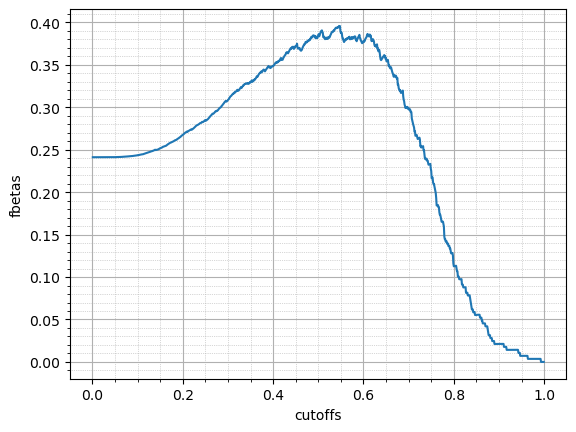

In [49]:
# creating dataframe with cutoffs and F2 score
df=pd.DataFrame({'fbetas':fbetas,'cutoffs':cutoffs})

# plot "cutoffs Vs F2"
sns.lineplot(data=df,x='cutoffs',y='fbetas')
plt.grid(which='major',linewidth=0.8)
plt.grid(which='minor',linestyle=':',linewidth=0.5)
plt.minorticks_on()  

**Cutoff= 0.54 and F2=0.396**

In [50]:
# predictions on test data
predictions_logr2=(model_logr2.predict_proba(x_test_std)[:,1]>my_cutoff).astype(int) 

In [52]:
pd.Series(predictions_logr2).value_counts()

0    3054
1     946
Name: count, dtype: int64

In [47]:
# creating a results .CSV file
predictions_logr2=pd.DataFrame({'V86':predictions_logr2})
predictions_logr2.to_csv('E:/Data science/Edvancer/ML with Python/Projects/Project 2_Marketing/logr_NaiduBabu_Yadla_P2_part_2.csv',index=False)

## RandomForest:

In [49]:
# importing the RandomForestClassifier from sklearn and saving the model in a object
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(bootstrap=True,class_weight='balanced',random_state=123) 

In [50]:
# parameters for "RandomForestClassifier"
model_rf.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [53]:
## trail-1:
# creating the different hyper parameters set's to pass it to model to estimate best parameters 
param_dist = {"n_estimators":[100,200,350,550,800], # no of trees build to estimate the output
              "max_features": [15,20,30,45,60,80,100,120], # No of features considered randomly(total features=123) 
                                                  #for selecting the best rule at each split
              
              #"bootstrap": [True, False],       # sampling with replacement (i.e True) or without replacement(i.e False)
              
              #'class_weight':[None,'balanced'], # for balanced data set--> 'None':equal-weights ,
                                                # for Imbalenced datset-->'balanced':inversely proportional to class frequencies
              
              #'criterion':['entropy','gini'],  # Homogeneity measure for selecting the best rule 
              'max_depth':[None,5,10,15,20,25], # max depth of a each tree
              'min_samples_leaf':[5,10,15,20,30,45,60], # min sample at leaf (or teminal) node after the split
              #'min_samples_split':[5,10,15,20,30,40,60] # min samples reqired to split the decision node.
                  }

# Cross Validation of model to identifying the best parameters  
rs_rf=RandomizedSearchCV(model_rf, # model
                         param_distributions=param_dist,# parameters
                         cv=10, # 10 old cross validation(higher value is better)
                         n_iter=50, # randomly select 'n_iter=50' cmbinations out of total possible cominations 
                         scoring='roc_auc', # evaluation metrics
                         n_jobs=-1,verbose=20) 

# traing the diffrent models on traing dataset
rs_rf.fit(x_train,y_train)

# storing the best model in a object
model_rf1=rs_rf.best_estimator_

# performance of different models 
report(rs_rf.cv_results_,3) 

Fitting 10 folds for each of 50 candidates, totalling 500 fits


NameError: name 'report' is not defined

In [58]:
# performance of different models 
report(rs_rf.cv_results_,3) 

Model with rank: 1
Mean validation score: 0.762376 (std: 0.036812)
Parameters: {'n_estimators': 100, 'min_samples_leaf': 15, 'max_features': 15, 'max_depth': 5}

Model with rank: 2
Mean validation score: 0.762219 (std: 0.037112)
Parameters: {'n_estimators': 800, 'min_samples_leaf': 30, 'max_features': 60, 'max_depth': 5}

Model with rank: 3
Mean validation score: 0.761361 (std: 0.037187)
Parameters: {'n_estimators': 200, 'min_samples_leaf': 30, 'max_features': 30, 'max_depth': 5}



In [56]:
# predicted classes on train data with best cross vlidation model
# normalization of data is not needed in Tree based models
y_train_pred_rf1=model_rf1.predict(x_train)

# actual classes
y_train_real_rf1=y_train

# F2 score
fbeta_score(y_pred=y_train_pred_rf1,y_true=y_train_real_rf1,beta=2)

0.461287988422576

#### Random Forest Model: F2 score= 0.461 which is better model than Logistic Regression model F2 score=0.396. So Random Forest model is better at present.

In [58]:
# prediction of classes on test data
predictions_rf1=model_rf1.predict(x_test)

# class counts 
pd.DataFrame(predictions_rf1).value_counts() 

0.0    3096
1.0     904
Name: count, dtype: int64

### SupportVectorMachines(SVM) Classifier: 

In [76]:
# importing SVM classifier libraries
from sklearn.svm import SVC

# storing the svm classifier in a object
model_svc=SVC(class_weight='balanced') 

In [77]:
# parameters for "SupportVectorMachines(SVM) Classifier"
model_svc.get_params() 

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [81]:
# parameter dicionaries 
params={'C': np.linspace(0.0001,10,30),
        'gamma': ['scale','auto'],
        'kernel': ['linear','poly', 'rbf', 'sigmoid'],
       #'class_weight':['balanced',None]
       }  

# cross validating the model on diffrent paramters combinaions
gs_svc=GridSearchCV(model_svc,cv=10,param_grid=params,n_jobs=-1,verbose=5,scoring='roc_auc')

# training the model on train data 
gs_svc.fit(x_train,y_train)

# storing the best model in a object
model_svc1=gs_svc.best_estimator_ 

# top models and their parameters
report(gs_svc.cv_results_,5)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Model with rank: 1
Mean validation score: 0.743754 (std: 0.041351)
Parameters: {'C': 1.0345724137931034, 'gamma': 'scale', 'kernel': 'rbf'}

Model with rank: 2
Mean validation score: 0.743658 (std: 0.040002)
Parameters: {'C': 0.3449241379310345, 'gamma': 'scale', 'kernel': 'poly'}

Model with rank: 3
Mean validation score: 0.743540 (std: 0.039889)
Parameters: {'C': 0.689748275862069, 'gamma': 'scale', 'kernel': 'rbf'}

Model with rank: 4
Mean validation score: 0.742168 (std: 0.042762)
Parameters: {'C': 1.379396551724138, 'gamma': 'scale', 'kernel': 'rbf'}

Model with rank: 5
Mean validation score: 0.740641 (std: 0.044088)
Parameters: {'C': 0.689748275862069, 'gamma': 'scale', 'kernel': 'poly'}



In [85]:
# predicting the target variable on total train datasets
# and selectiong the probabilities of 'Yes' or '1'
y_train_pred=model_svc1.predict(x_train)

# actual target variable on total train datasets
y_train_real=y_train 

fbeta_score(y_true=y_train_real,y_pred=y_train_pred,beta=2)

0.45955303745672016

In [87]:
# prediction of classes on test data
predictions_svc1=model_svc1.predict(x_test)

# class counts 
pd.DataFrame(predictions_svc1).value_counts()

0.0    2798
1.0    1202
Name: count, dtype: int64

In [88]:
predictions_svc1_marketing=pd.DataFrame({'V86':predictions_svc1})

predictions_svc1_marketing.to_csv('marketing_svc_pred.csv',index=False)

------- completed------------------

### Classification with XGBoost:

In [142]:
#! pip install xgboost

In [56]:
from xgboost.sklearn import XGBClassifier
XGBClassifier().get_params() 

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### Sequenctial Tuning of XGBoost Classifier: 
- First we fix the parameters with most volatile performance (i.e no of trees or n_estimators, learning rate)
- Second controling the individual tree(weak learner):

             - 'gamma'or 'min_split_loss': min loss reduction reqired to split (higher is conservative)
             - 'min_child_weight': min amount of impurity reqired to split(higher is conservative)
             - 'max_depth':max depth of individual tree (lower is better) 
             - 'subsample': subsampling ratio of training instances(0. to 1)
             - 'colsample_bytree': subsampling ratio of columns for each tree
             
- regularization parameters:

             - 'lambda': Ridge or L2
             - 'alpha': lasso or L1 

In [101]:
##Sequenctial Tuning: 

# first we fix the parameters with most volatile performance i.e n_estimators by taking learning rate=0.1
xgb_params = { "n_estimators":[25,50,100,500,700,900,1000,1200]}

xgb1=XGBClassifier(learning_rate=0.05,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8,)

grid_search=GridSearchCV(xgb1,cv=10,param_grid=xgb_params,scoring='roc_auc',verbose=False,n_jobs=-1)

grid_search.fit(x_train,y_train)
report(grid_search.cv_results_,3)  

Model with rank: 1
Mean validation score: 0.764176 (std: 0.035866)
Parameters: {'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.759021 (std: 0.038865)
Parameters: {'n_estimators': 50}

Model with rank: 3
Mean validation score: 0.756935 (std: 0.034557)
Parameters: {'n_estimators': 25}



In [102]:
xgb_params = {"gamma":[0,1,2,5,8,10],
              "max_depth": [2,3,4,5,6,7,8],
              "min_child_weight":[0.25,0.5,1,2,5,10] }

xgb2=XGBClassifier(n_estimators=100,learning_rate=0.05,
                   subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

random_search=RandomizedSearchCV(xgb2,param_distributions=xgb_params,
                                 n_iter=30,cv=10,
                                 scoring='roc_auc',
                                 verbose=False,n_jobs=-1)

random_search.fit(x_train,y_train)
report(random_search.cv_results_,3) 

Model with rank: 1
Mean validation score: 0.774180 (std: 0.032240)
Parameters: {'min_child_weight': 2, 'max_depth': 3, 'gamma': 1}

Model with rank: 2
Mean validation score: 0.773006 (std: 0.033020)
Parameters: {'min_child_weight': 0.25, 'max_depth': 3, 'gamma': 1}

Model with rank: 3
Mean validation score: 0.770845 (std: 0.035033)
Parameters: {'min_child_weight': 0.25, 'max_depth': 4, 'gamma': 2}



In [103]:
# scale_pos_weight: (Freq of -ve instances/ Freq of +ve instances) optimal classification; 6/94
xgb_params={'max_delta_step':range(0,10), 
            'scale_pos_weight':range(5,20) 
           }

xgb3=XGBClassifier(n_estimators=100,learning_rate=0.05,
                   min_child_weight=2,max_depth=3,gamma=1,
                   subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

grid_search=GridSearchCV(xgb3,param_grid=xgb_params,
                         cv=10,scoring='roc_auc',
                         n_jobs=-1,verbose=False)

grid_search.fit(x_train,y_train)
report(grid_search.cv_results_,3)  

Model with rank: 1
Mean validation score: 0.775986 (std: 0.027965)
Parameters: {'max_delta_step': 0, 'scale_pos_weight': 9}

Model with rank: 1
Mean validation score: 0.775986 (std: 0.027965)
Parameters: {'max_delta_step': 3, 'scale_pos_weight': 9}

Model with rank: 1
Mean validation score: 0.775986 (std: 0.027965)
Parameters: {'max_delta_step': 4, 'scale_pos_weight': 9}

Model with rank: 1
Mean validation score: 0.775986 (std: 0.027965)
Parameters: {'max_delta_step': 5, 'scale_pos_weight': 9}

Model with rank: 1
Mean validation score: 0.775986 (std: 0.027965)
Parameters: {'max_delta_step': 6, 'scale_pos_weight': 9}

Model with rank: 1
Mean validation score: 0.775986 (std: 0.027965)
Parameters: {'max_delta_step': 7, 'scale_pos_weight': 9}

Model with rank: 1
Mean validation score: 0.775986 (std: 0.027965)
Parameters: {'max_delta_step': 8, 'scale_pos_weight': 9}

Model with rank: 1
Mean validation score: 0.775986 (std: 0.027965)
Parameters: {'max_delta_step': 9, 'scale_pos_weight': 9}



In [106]:
xgb_params={ 'subsample':[i/10 for i in range(5,11)],
            'colsample_bytree':[i/10 for i in range(5,11)],
            'colsample_bylevel':[i/10 for i in range(5,11)]
           }

xgb4=XGBClassifier(n_estimators=100,learning_rate=0.05,
                   min_child_weight=1,max_depth=2,gamma=2,
                   max_delta_step=0, scale_pos_weight=9 ) 

random_search=RandomizedSearchCV(xgb4,param_distributions=xgb_params,
                                 cv=10,n_iter=50,scoring='roc_auc',
                                 n_jobs=-1,verbose=False)

random_search.fit(x_train,y_train)
report(random_search.cv_results_,3)  

Model with rank: 1
Mean validation score: 0.776702 (std: 0.033199)
Parameters: {'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6}

Model with rank: 2
Mean validation score: 0.775246 (std: 0.033162)
Parameters: {'subsample': 0.9, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}

Model with rank: 3
Mean validation score: 0.774983 (std: 0.033132)
Parameters: {'subsample': 1.0, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.7}



In [109]:
xgb_params={'reg_lambda':[i/10 for i in range(0,50)],
            'reg_alpha':[i/10 for i in range(0,50)]
           }
xgb5=XGBClassifier(n_estimators=100,learning_rate=0.05,
                   min_child_weight=1,max_depth=2,gamma=2,
                   max_delta_step=2, scale_pos_weight=7 ,
                   subsample=0.9,colsample_bylevel=0.6,colsample_bytree=0.9)

random_search=RandomizedSearchCV(xgb5,param_distributions=xgb_params,
                                 cv=10,n_iter=200,scoring='roc_auc',
                                 n_jobs=-1,verbose=False,random_state=123)

random_search.fit(x_train,y_train)
report(random_search.cv_results_,3) 

Model with rank: 1
Mean validation score: 0.775702 (std: 0.033046)
Parameters: {'reg_lambda': 0.0, 'reg_alpha': 2.9}

Model with rank: 2
Mean validation score: 0.775418 (std: 0.032834)
Parameters: {'reg_lambda': 0.0, 'reg_alpha': 2.8}

Model with rank: 3
Mean validation score: 0.775299 (std: 0.031891)
Parameters: {'reg_lambda': 0.4, 'reg_alpha': 3.3}



In [110]:
xgb6=random_search.best_estimator_
xgb6

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=2, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

#### The best model out of the above all was XGBoost(xgb5 or xgb6): with ROC_AUC score: 77.57% and next best model is RandomForest:with ROC_AUC score: 76.23%  

In [111]:
from sklearn.model_selection import cross_val_score 
scores=cross_val_score(xgb6,x_train,y_train,scoring='roc_auc',
                      verbose=20,n_jobs=-1,cv=10) 

scores.mean() ,scores.std() 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [ ]:
# predicting the classes using XGBoost Classifier 
predictions_xgb_marketing=pd.DataFrame({'V86':xgb6.predict(x_test)})

predictions_xgb_marketing.to_csv('marketing_xgb_pred.csv',index=False)